In [4]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [31]:
train = pd.read_csv('train.csv')
print(train.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
n_features = train.select_dtypes(include=[np.number])
train = train.drop(['PassengerId'],axis=1)

In [7]:
def handle_non_numerical_data(train):
    cols = train.columns.values
    for col in cols:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if train[col].dtype != np.int64 and train[col].dtype != np.float64:
            column_contents = train[col].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            train[col] = list(map(convert_to_int, train[col]))

    return train

In [9]:
train = handle_non_numerical_data(train)
print(train.head())


   Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  \
0         0       3   266    0  22.0      1      0     344   7.2500      0   
1         1       1   110    1  38.0      1      0     411  71.2833     75   
2         1       3   130    1  26.0      0      0     111   7.9250      0   
3         1       1   646    1  35.0      1      0     271  53.1000    138   
4         0       3   501    0  35.0      0      0     224   8.0500      0   

   Embarked  
0         1  
1         3  
2         1  
3         1  
4         1  


In [10]:
print(train.dtypes)

Survived      int64
Pclass        int64
Name          int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket        int64
Fare        float64
Cabin         int64
Embarked      int64
dtype: object


In [11]:
# Null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

          Null Count
Feature             
Age              177
Embarked           0
Cabin              0
Fare               0
Ticket             0
Parch              0
SibSp              0
Sex                0
Name               0
Pclass             0
Survived           0


In [12]:
##handling missing value
train['Age'].fillna(train['Age'].mean(), inplace=True)
nullsnew = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
nullsnew.columns  = ['Null Count']
nullsnew.index.name  = 'Feature'
print(nullsnew)

          Null Count
Feature             
Embarked           0
Cabin              0
Fare               0
Ticket             0
Parch              0
SibSp              0
Age                0
Sex                0
Name               0
Pclass             0
Survived           0


In [13]:
# CORRELATED FEATURES
corr = n_features.corr()
print('The top 3 correlated features \n')
print(corr['Survived'].sort_values(ascending=False)[:3], '\n')

The top 3 correlated features 

Survived    1.000000
Fare        0.257307
Parch       0.081629
Name: Survived, dtype: float64 



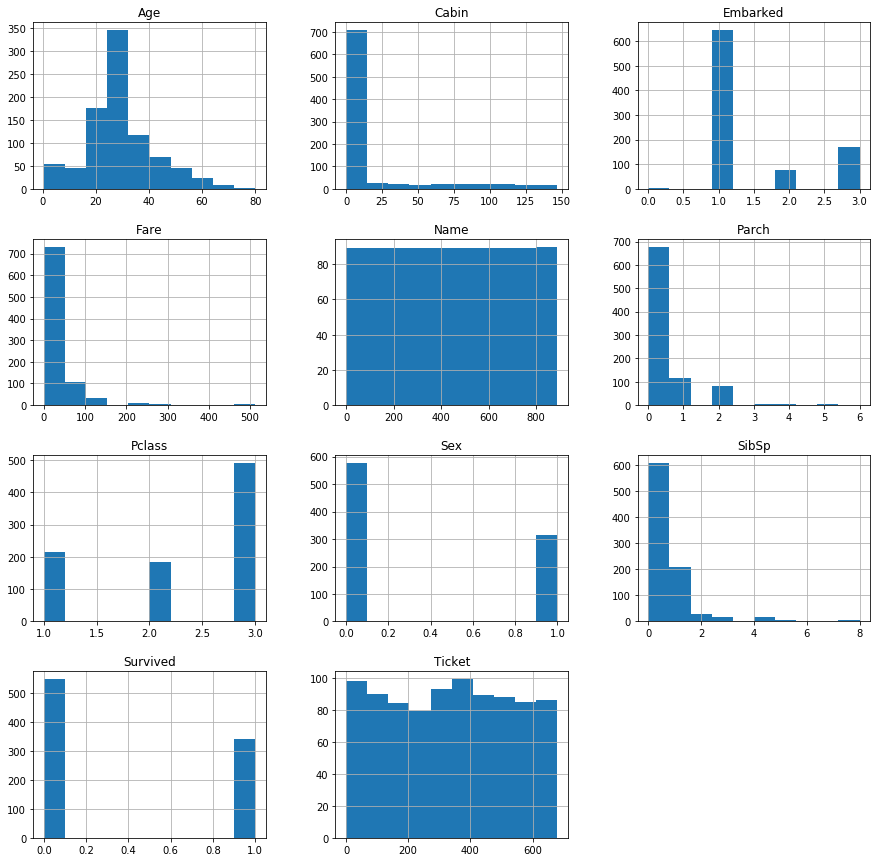

In [14]:
import matplotlib.pyplot as plt
train[train.dtypes[(train.dtypes=="float64")|(train.dtypes=="int64")]
                      .index.values].hist(figsize=[15,15])
plt.show();


In [15]:
x_train = np.array(train.drop(['Survived'], 1).astype(float))
y_train = np.array(train['Survived'])

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [17]:

#Naive Bayes

guassian = GaussianNB()
guassian.fit(x_train,y_train)
y_pred = guassian.predict(x_test)
guassian_score = round(guassian.score(x_test,y_test) * 100,2)

print("Accuracy Score:",guassian_score)

Accuracy Score: 77.99


In [18]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.81       168
           1       0.67      0.80      0.73       100

    accuracy                           0.78       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.79      0.78      0.78       268



In [19]:
#svc

svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
svc_accuracy = round(svc.score(x_test, y_test) * 100, 2)

print("SVC Score:",svc_accuracy)

SVC Score: 69.4


In [20]:
print("SVC Classification Report:\n",classification_report(y_test,y_pred))

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.98      0.80       168
           1       0.88      0.21      0.34       100

    accuracy                           0.69       268
   macro avg       0.78      0.60      0.57       268
weighted avg       0.75      0.69      0.63       268



In [21]:
#KNN

#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)

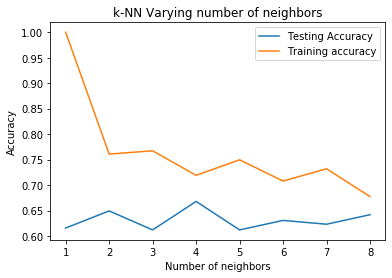

In [22]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [24]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=6)

#Fit the model
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
knn_accuracy = round(knn.score(x_test, y_test) * 100, 2)

print("KNN Score:",knn_accuracy)

KNN Score: 63.06


In [25]:
print("KNN Classification Report:\n",classification_report(y_test,y_pred))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.90      0.75       168
           1       0.52      0.17      0.26       100

    accuracy                           0.63       268
   macro avg       0.58      0.54      0.50       268
weighted avg       0.60      0.63      0.57       268



In [27]:
# Linear SVM
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
svclinear_accuracy = round(svc.score(x_test, y_test) * 100, 2)
print("SVM linear Score:",svclinear_accuracy)

SVM linear Score: 79.1


In [28]:
print("SVM linear Classification Report:\n",classification_report(y_test,y_pred))

SVM linear Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       168
           1       0.73      0.70      0.71       100

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [29]:
# NonLinear SVM
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
svclinear_accuracy = round(svc.score(x_test, y_test) * 100, 2)

print("SVM nonlinear Score:",svclinear_accuracy)

SVM nonlinear Score: 69.4


In [30]:
print("SVM onlinear Classification Report:\n",classification_report(y_test,y_pred))

SVM onlinear Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.98      0.80       168
           1       0.88      0.21      0.34       100

    accuracy                           0.69       268
   macro avg       0.78      0.60      0.57       268
weighted avg       0.75      0.69      0.63       268

